In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import sys
sys.path.append('../')

from bin.basket_scoring import read_basket_scores, read_sub_basket_scores

In [6]:
data_dir = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Follow-up/YAP_TAZ_project'

In [3]:
metadata_df = pd.read_excel(f'{data_dir}/MASTER_PIDS_Phosphoproteomics_untilBatch142_231030_editMW.xlsx', sheet_name='proMASTER_anno')
metadata_df.head()

Sample_name ProjectID PatientID TumorID_pro QualityID_pro  \
0  H021-7AAYWW-T1      H021    7AAYWW          T1           NaN   
1  H021-7AAYWW-T2      H021    7AAYWW          T2           NaN   
2  H021-ENQC15-T1      H021    ENQC15          T1           NaN   
3  H021-ENQC15-T3      H021    ENQC15          T3           NaN   
4  H021-QFC8A8-T1      H021    QFC8A8          T1           NaN   

  PID_sample_pro  H021_P021  pro_replicate  in_dataMASTER231018_release  \
0      7AAYWW-T1       True          False                         True   
1      7AAYWW-T2       True          False                         True   
2      ENQC15-T1       True          False                         True   
3      ENQC15-T3       True          False                        False   
4      QFC8A8-T1       True          False                         True   

   validData_in_dataMASTER231018_release  ... NF2_alt  CAMTA1_alt  YAP1_alt  \
0                                   True  ...     NaN         NaN       NaN   
1                                   True  ...     NaN         NaN       NaN   
2                                   True  ...     NaN         NaN       NaN   
3                                  False  ...     NaN         NaN       NaN   
4                                   True  ...     NaN         NaN       NaN   

  WWTR1_alt  FOXR1_alt  TEAD3_alt  STK3_alt  TEAD4_alt  TEAD1_alt  \
0       NaN        NaN        NaN       NaN        NaN        NaN   
1       NaN        NaN        NaN       NaN        NaN        NaN   
2       NaN        NaN        NaN       NaN        NaN        NaN   
3       NaN        NaN        NaN       NaN        NaN        NaN   
4       NaN        NaN        NaN       NaN        NaN        NaN   

   hippo_alt_bool  
0           False  
1           False  
2           False  
3             NaN  
4           False  

[5 rows x 69 columns]

In [18]:
metadata_subset_df = metadata_df.set_index('Sample_name')[['TumorCellContent', 'YAP_TAZ_target_score']]
metadata_subset_df = metadata_subset_df.dropna()

In [10]:
basket_scores_df = read_basket_scores(f'{data_dir}/wp3_pipeline_results', z_scored=True)
subbasket_scores_df = read_sub_basket_scores(f'{data_dir}/wp3_pipeline_results')

In [9]:
basket_scores_df

HIPPO
Sample                      
A26K-5SXQR3-T11-Q1  0.396770
A26K-5SXQR3-T24-Q1  0.694149
A26K-HS3BDB-T14-Q1  0.030579
A26K-JHRA29-T12-Q1  0.929332
A26K-NBD9LE-T22-Q1  1.501693
...                      ...
S033-33+025-T1-Q1  -0.891606
S033-33+026-T1-Q1   1.297918
S033-33+029-T1-Q1   2.679044
S033-33+030-T1-Q1   0.109217
S033-33+031-T1-Q1   1.673989

[918 rows x 1 columns]

In [13]:
subbasket_scores_df = subbasket_scores_df.T
subbasket_scores_df = subbasket_scores_df.loc[~subbasket_scores_df.index.str.contains("targets_"), :]
subbasket_scores_df

HIPPO - Hippo kinase core - kinase activity  \
Sample name                                                       
A26K-5SXQR3-T11-Q1                                     0.907815   
A26K-5SXQR3-T24-Q1                                     0.319265   
A26K-HS3BDB-T14-Q1                                     0.975108   
A26K-JHRA29-T12-Q1                                     0.451511   
A26K-NBD9LE-T22-Q1                                    -0.446966   
...                                                         ...   
S033-33+025-T1-Q1                                      0.678894   
S033-33+026-T1-Q1                                      2.292980   
S033-33+029-T1-Q1                                      1.957358   
S033-33+030-T1-Q1                                      1.408938   
S033-33+031-T1-Q1                                      0.446358   

                    HIPPO - Hippo kinase core - phosphorylation  \
Sample name                                                       
A26K-5SXQR3-T11-Q1                                     0.748855   
A26K-5SXQR3-T24-Q1                                    -0.047503   
A26K-HS3BDB-T14-Q1                                     1.712376   
A26K-JHRA29-T12-Q1                                     0.535153   
A26K-NBD9LE-T22-Q1                                     1.284959   
...                                                         ...   
S033-33+025-T1-Q1                                      1.912936   
S033-33+026-T1-Q1                                      4.000000   
S033-33+029-T1-Q1                                      2.965813   
S033-33+030-T1-Q1                                      1.718049   
S033-33+031-T1-Q1                                      1.307212   

                    HIPPO - YAP/TAZ - expression  \
Sample name                                        
A26K-5SXQR3-T11-Q1                      0.522714   
A26K-5SXQR3-T24-Q1                      2.411289   
A26K-HS3BDB-T14-Q1                     -1.101489   
A26K-JHRA29-T12-Q1                      1.042060   
A26K-NBD9LE-T22-Q1                      3.704515   
...                                          ...   
S033-33+025-T1-Q1                      -0.256589   
S033-33+026-T1-Q1                      -0.899971   
S033-33+029-T1-Q1                       1.346696   
S033-33+030-T1-Q1                      -1.472630   
S033-33+031-T1-Q1                       3.051661   

                    HIPPO - YAP/TAZ - important phosphorylation  \
Sample name                                                       
A26K-5SXQR3-T11-Q1                                     1.149067   
A26K-5SXQR3-T24-Q1                                     0.455142   
A26K-HS3BDB-T14-Q1                                     0.886583   
A26K-JHRA29-T12-Q1                                     1.794025   
A26K-NBD9LE-T22-Q1                                     0.943916   
...                                                         ...   
S033-33+025-T1-Q1                                      1.863286   
S033-33+026-T1-Q1                                      2.513345   
S033-33+029-T1-Q1                                      2.622080   
S033-33+030-T1-Q1                                      1.666954   
S033-33+031-T1-Q1                                      1.181169   

                    HIPPO - negative pathway regulation - expression  \
Sample name                                                            
A26K-5SXQR3-T11-Q1                                          4.000000   
A26K-5SXQR3-T24-Q1                                          4.000000   
A26K-HS3BDB-T14-Q1                                          2.732558   
A26K-JHRA29-T12-Q1                                          4.000000   
A26K-NBD9LE-T22-Q1                                          4.000000   
...                                                              ...   
S033-33+025-T1-Q1                                           1.906440   
S033-33+026-T1-Q1                                           4.000000   
S033-33

In [47]:
basket_member_zscore_df = pd.read_csv(f'{data_dir}/wp3_pipeline_results/basket_member_z_scores_HIPPO.tsv', sep='\t', index_col=0)
basket_member_zscore_df

LATS1 - Hippo kinase core - kinase activity  \
I007-031-108742                                      -1.530448   
I043-005-95540                                       -2.374546   
I007-020-1007541                                     -1.231657   
I007-039-130734                                      -1.175357   
I043-001-80842                                       -2.416196   
...                                                        ...   
H021-QL9PAA-M1-Q1                                    -0.118129   
H021-QX9D21-M5-Q1                                    -1.760618   
H021-WNTLNE-M2-E2                                    -0.205047   
S033-33+030-T1-Q1                                     0.765713   
S033-33+031-T1-Q1                                    -0.501304   

                   LATS2 - Hippo kinase core - kinase activity  \
I007-031-108742                                      -1.654144   
I043-005-95540                                       -2.827908   
I007-020-1007541                                     -1.302467   
I007-039-130734                                      -1.267764   
I043-001-80842                                       -2.846842   
...                                                        ...   
H021-QL9PAA-M1-Q1                                     0.599994   
H021-QX9D21-M5-Q1                                    -0.935359   
H021-WNTLNE-M2-E2                                     0.678405   
S033-33+030-T1-Q1                                     1.408938   
S033-33+031-T1-Q1                                     0.446358   

                   STK3 - Hippo kinase core - kinase activity  \
I007-031-108742                                     -0.786176   
I043-005-95540                                      -1.588348   
I007-020-1007541                                     0.073348   
I007-039-130734                                     -0.509939   
I043-001-80842                                      -1.164569   
...                                                       ...   
H021-QL9PAA-M1-Q1                                    0.137598   
H021-QX9D21-M5-Q1                                   -2.999450   
H021-WNTLNE-M2-E2                                   -2.275915   
S033-33+030-T1-Q1                                   -0.964258   
S033-33+031-T1-Q1                                    0.049042   

                   STK4 - Hippo kinase core - kinase activity  \
I007-031-108742                                      0.603927   
I043-005-95540                                       1.397521   
I007-020-1007541                                     1.610908   
I007-039-130734                                      0.220249   
I043-001-80842                                       1.835936   
...                                                       ...   
H021-QL9PAA-M1-Q1                                   -0.504156   
H021-QX9D21-M5-Q1                                    0.593909   
H021-WNTLNE-M2-E2                                   -0.338605   
S033-33+030-T1-Q1                                   -1.572017   
S033-33+031-T1-Q1                                   -1.435454   

                   LATS1 - Hippo kinase core - phosphorylation  \
I007-031-108742                                      -0.770436   
I043-005-95540                                       -1.546845   
I007-020-1007541                                     -0.548959   
I007-039-130734                                      -0.645741   
I043-001-80842                                       -0.915224   
...                                                        ...   
H021-QL9PAA-M1-Q1                                    -1.176032   
H021-QX9D21-M5-Q1                                    -0.483966   
H021-WNTLNE-M2-E2                                    -0.146400   
S033-33+030-T1-Q1                                     0.859443   
S033-33+031-T1-Q1                                     0.171776   

                   LATS1;LATS2 - Hippo kinase core - phosphorylation  \
I007-0

In [68]:
print(set(metadata_subset_df.index).difference(set(sorted(basket_scores_df.index))))
print(set(metadata_subset_df.index).difference(set(sorted(subbasket_scores_df.index))))
print(set(metadata_subset_df.index).difference(set(sorted(basket_member_zscore_df.index))))

{'H021-DNATQ4-M1-Q1', 'H021-X5TC7W-T3', 'H021-HD3K98-M1-Q1', 'H021-X4JH5X-T1-Q1', 'H021-LUDC83-M2-Q1', 'H021-96WLTJ-T1-Q1', 'H021-RDC7CA-M2-Q1', 'H021-HGZEZ3-M4'}
{'H021-R427FX-M1-E2', 'H021-DNATQ4-M1-Q1', 'H021-R1MH42-T1', 'H021-HD3K98-M1-Q1', 'H021-X4JH5X-T1-Q1', 'H021-LUDC83-M2-Q1', 'H021-96WLTJ-T1-Q1', 'H021-RDC7CA-M2-Q1'}
{'H021-DNATQ4-M1-Q1', 'H021-X5TC7W-T3', 'H021-HD3K98-M1-Q1', 'H021-X4JH5X-T1-Q1', 'H021-LUDC83-M2-Q1', 'H021-96WLTJ-T1-Q1', 'H021-RDC7CA-M2-Q1', 'H021-HGZEZ3-M4'}


In [61]:
result_df = (
    metadata_subset_df
    .join(basket_scores_df, how='inner')
    .join(subbasket_scores_df, how='inner')
    .join(basket_member_zscore_df, how='inner')
)

In [72]:
result_df.to_csv(f'{data_dir}/correlation_results/z_scores.tsv', sep='\t')

In [78]:
def plot_correlation(result_df, x, y, data_dir):
    sns.lmplot(data = result_df, x=x, y=y)
    r = round(stats.pearsonr(result_df[x], result_df[y])[0], 2)
    plt.title(f'{y} (pearson = {r})')
    plt.tight_layout()
    plt.savefig(f'{data_dir}/correlation_results/{y.replace("/", "_").replace(" ", "_")}.png', bbox_inches = 'tight')

/home/matthewt/.cache/pypoetry/virtualenvs/wp3-sample-pipeline-OkE4pj9k-py3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


No common values for _DESTDSGLpSM(Oxidation (M))SSYSVPR_ - YAP/TAZ - important phosphorylation
No common values for _TPDDFLNpSVDEMDTGDTINQSTLPSQQNR_ - YAP/TAZ - important phosphorylation


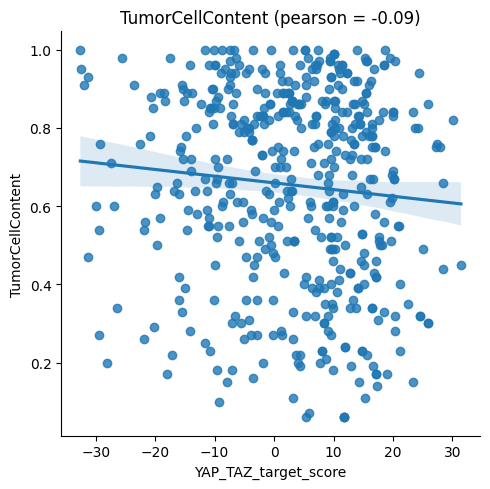

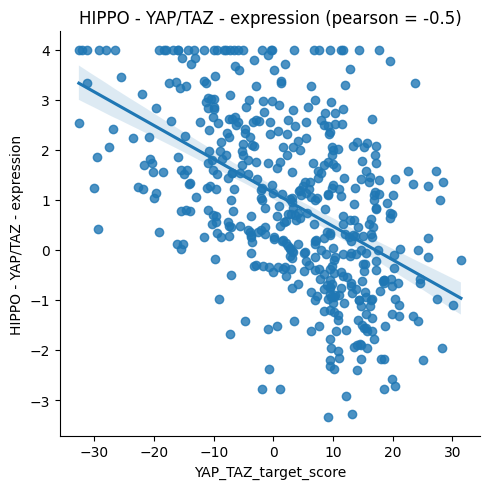

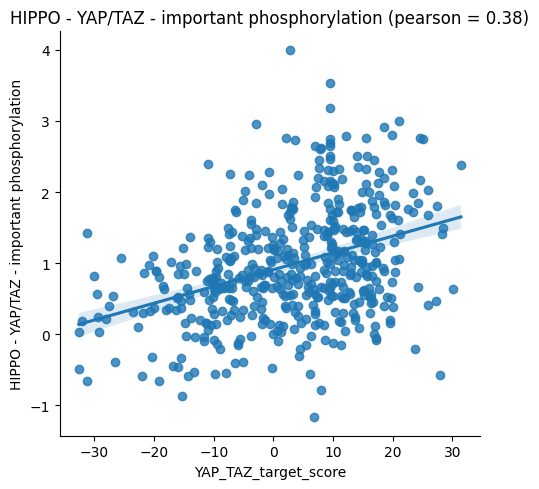

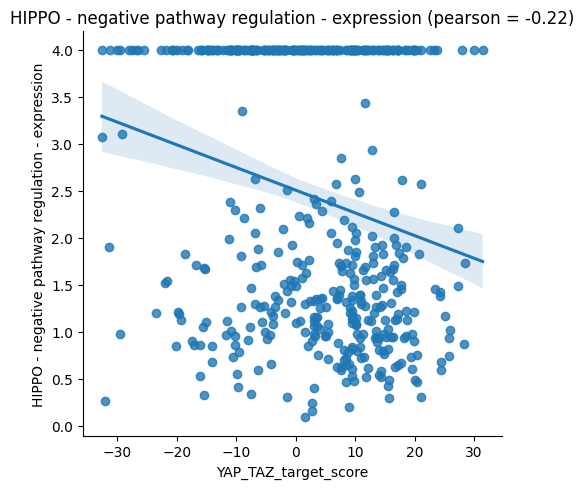

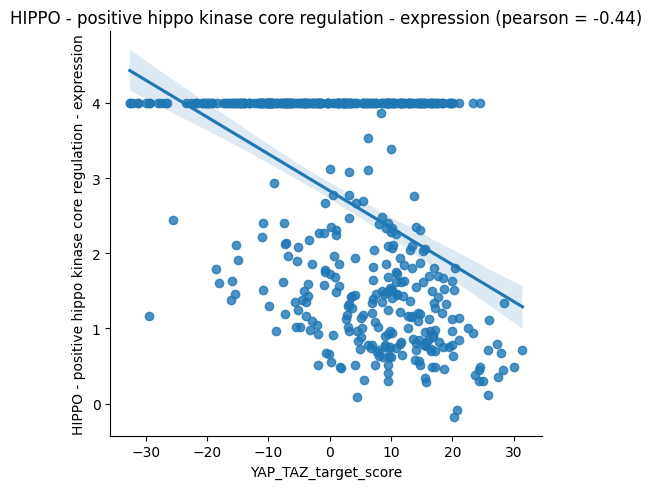

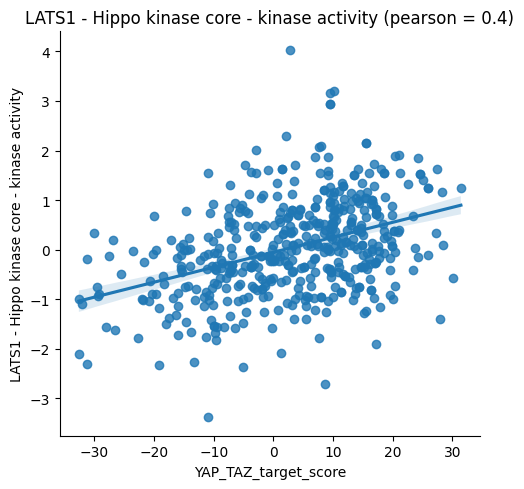

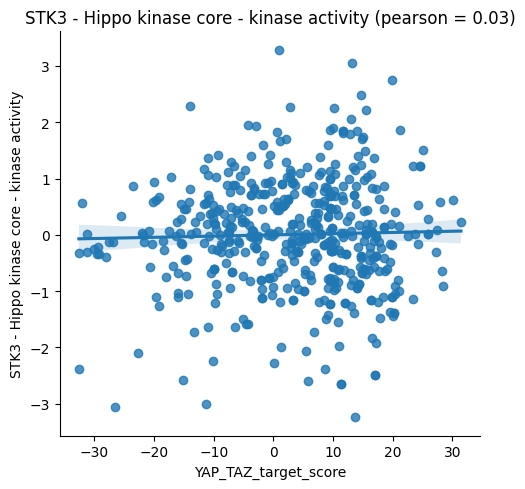

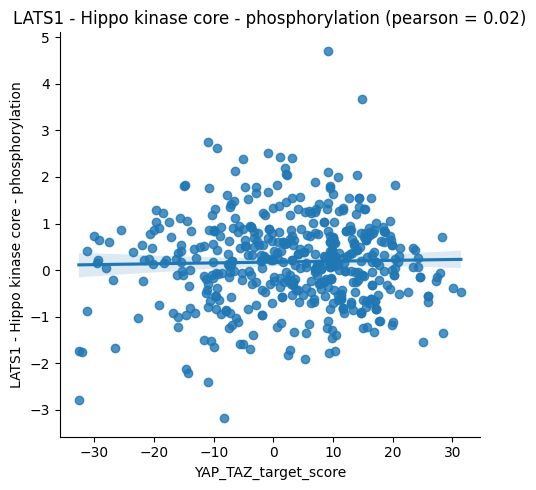

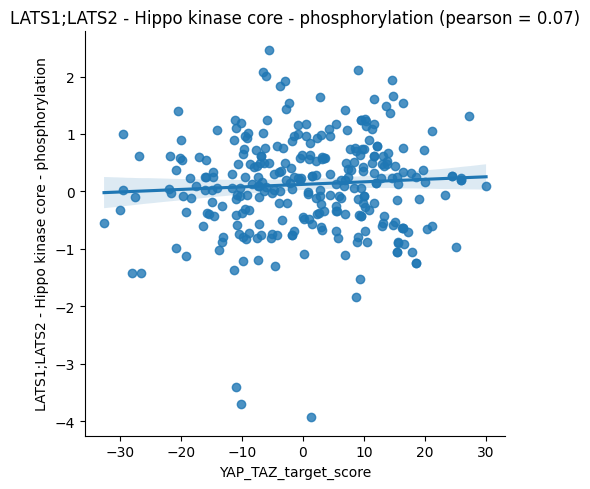

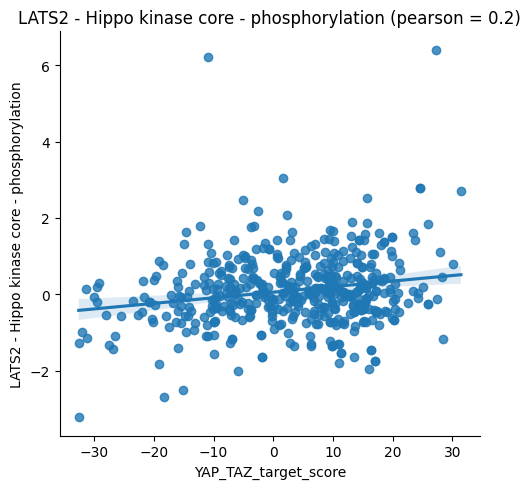

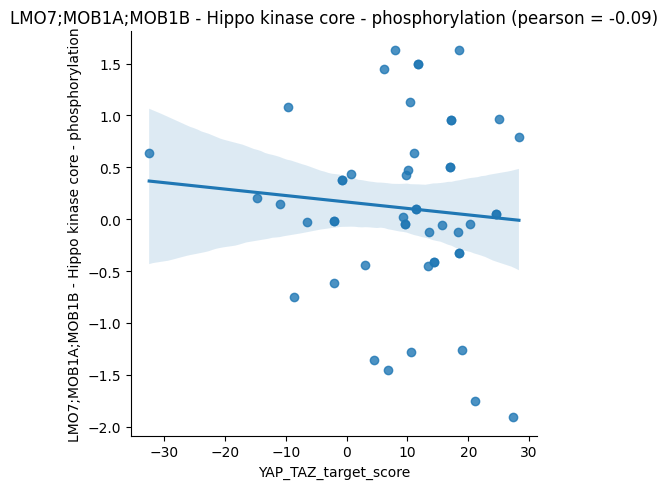

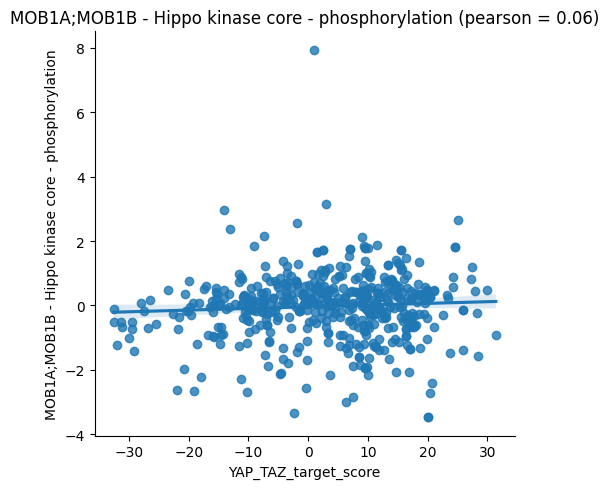

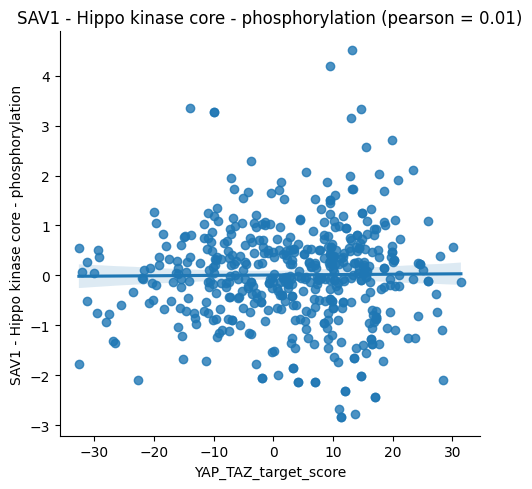

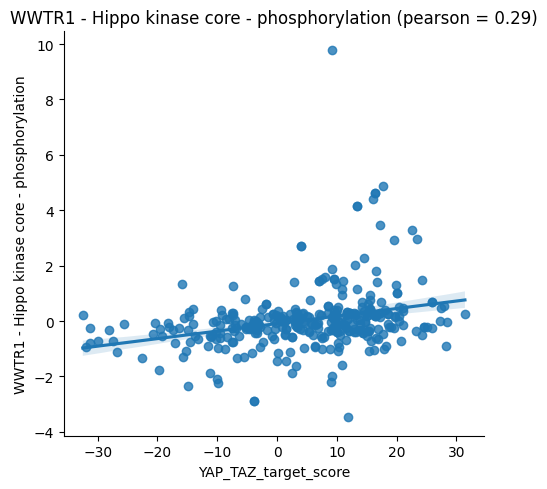

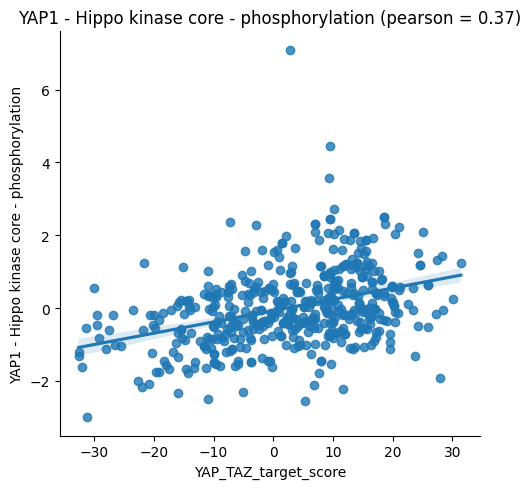

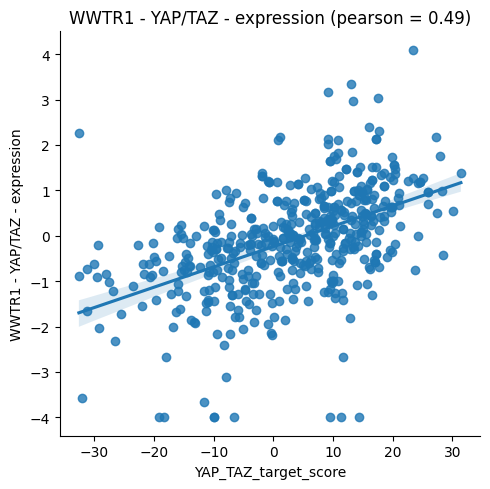

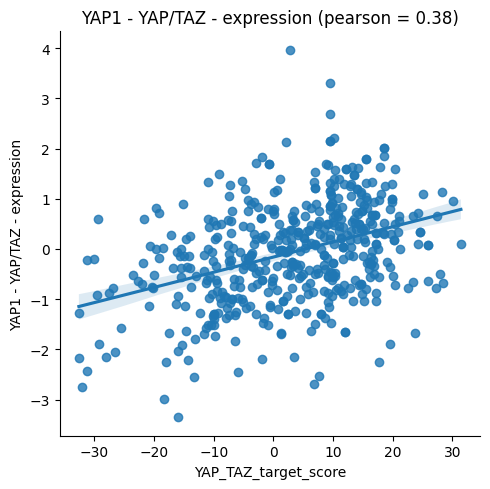

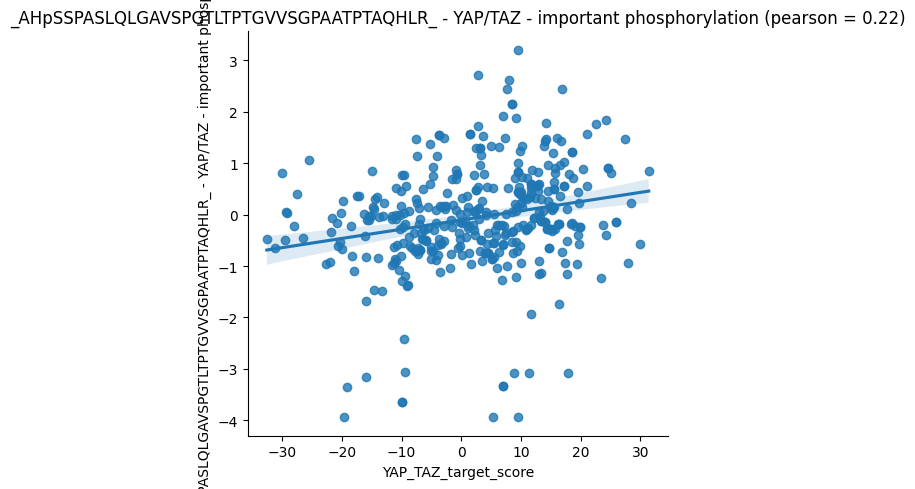

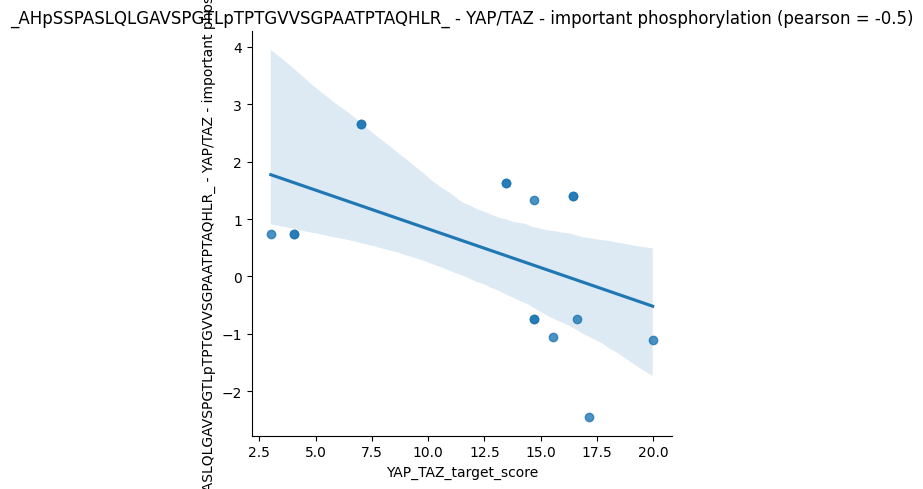

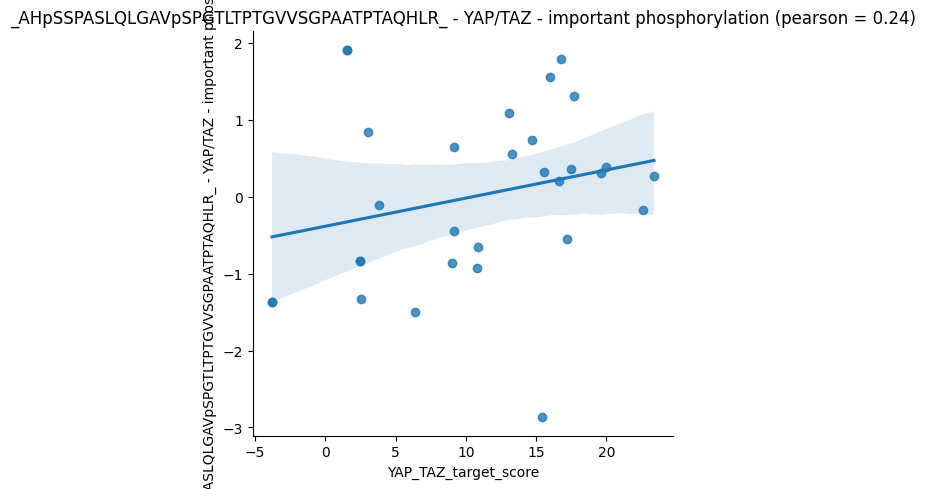

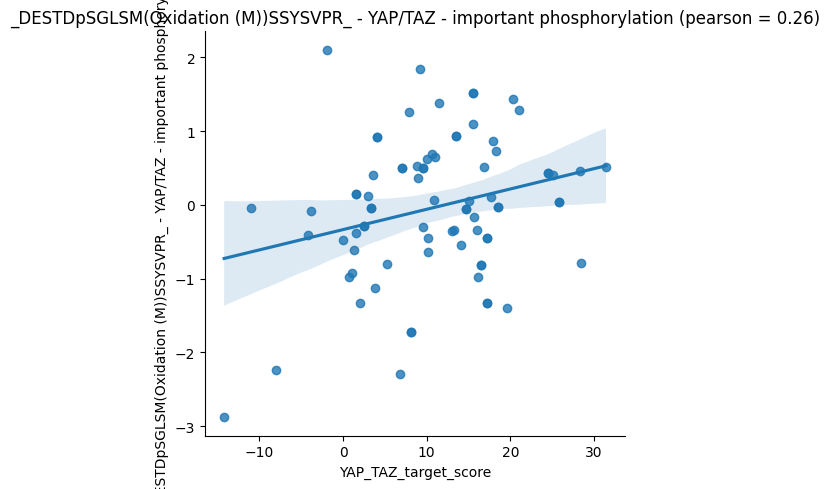

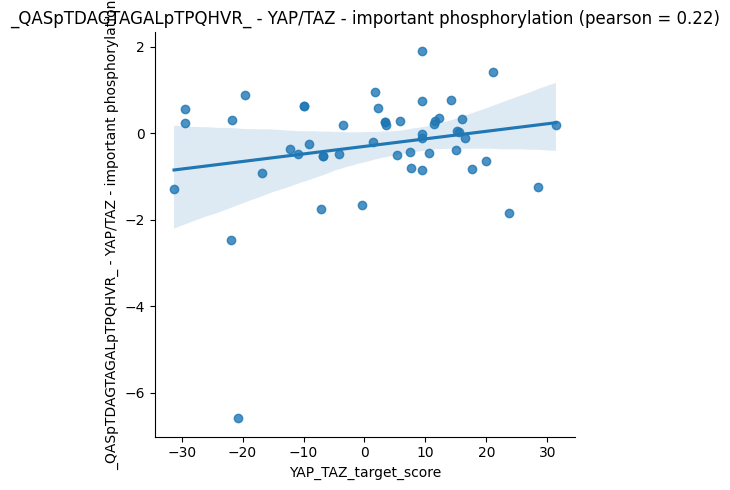

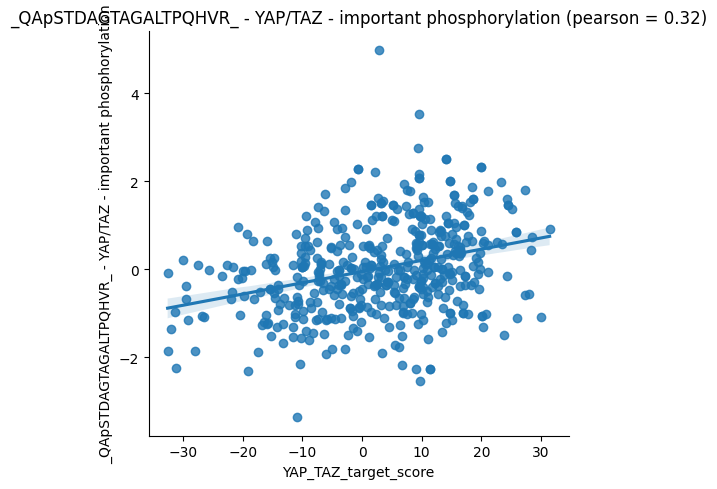

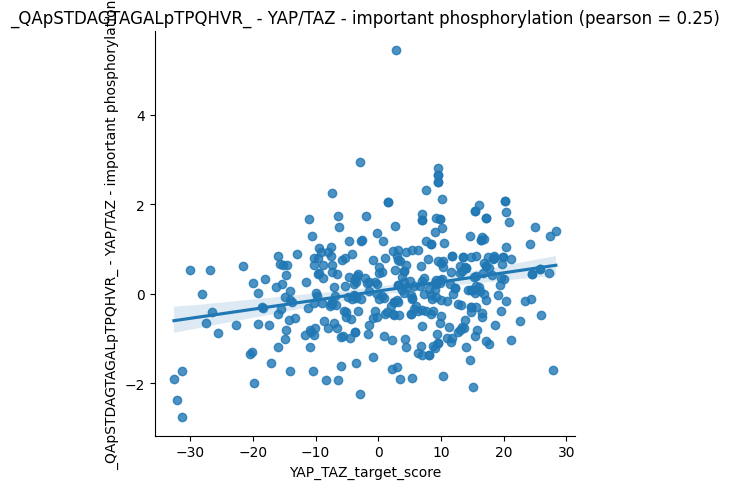

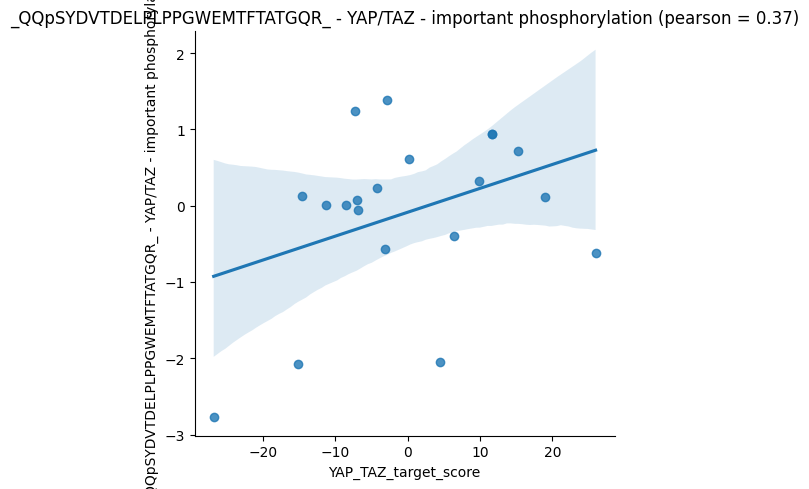

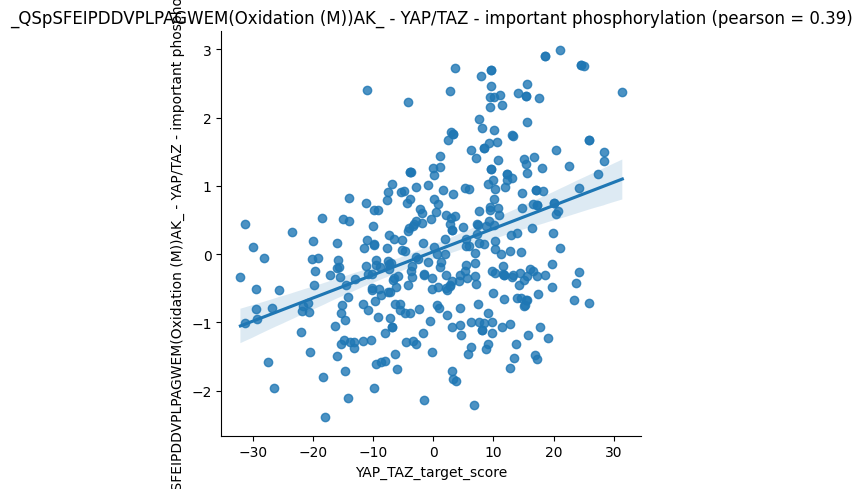

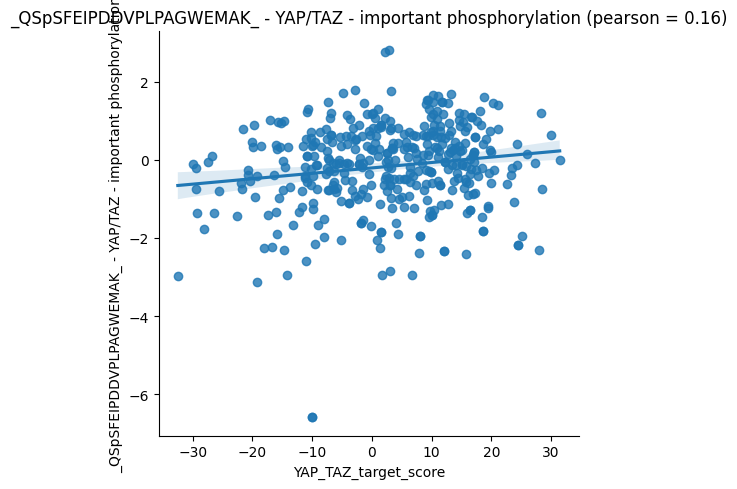

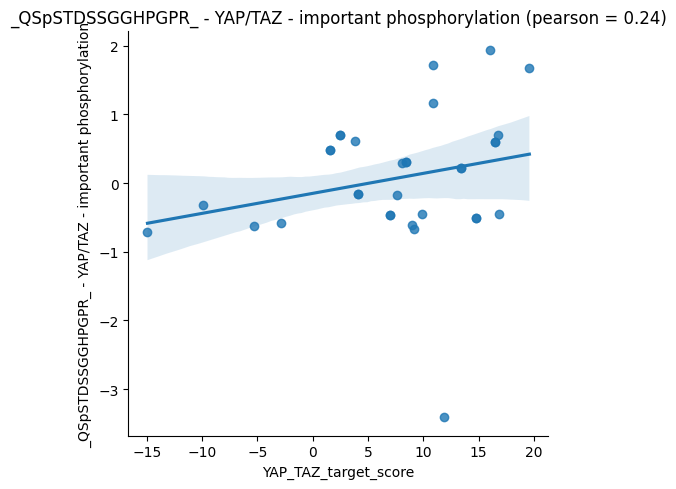

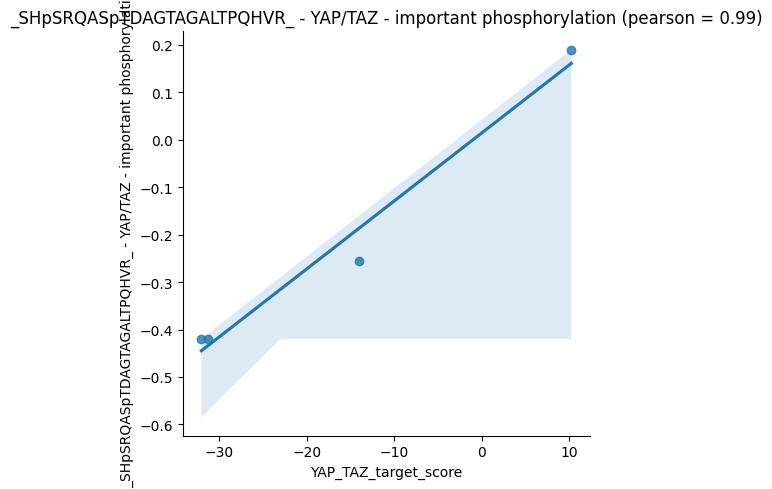

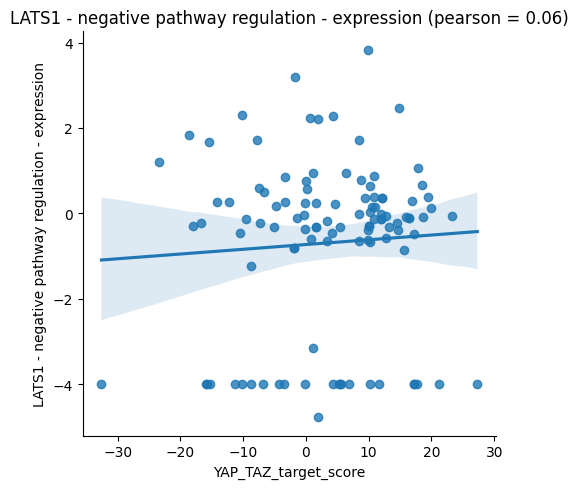

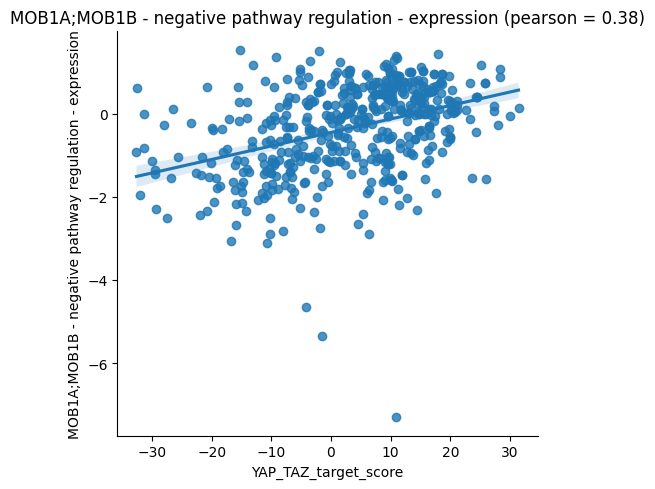

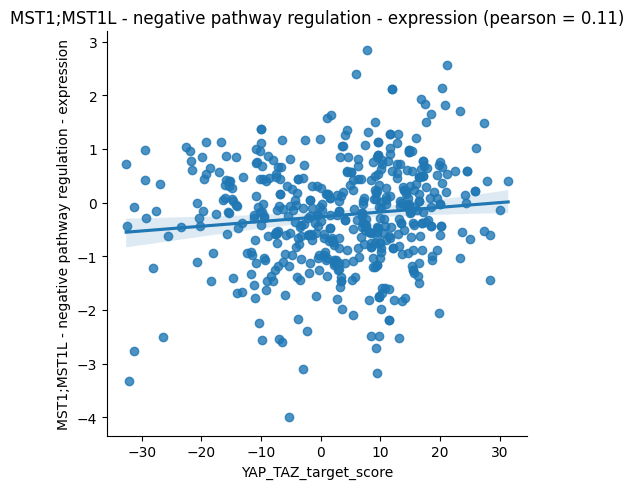

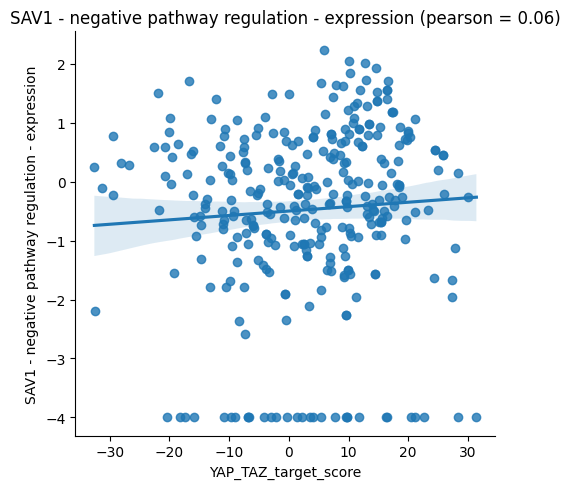

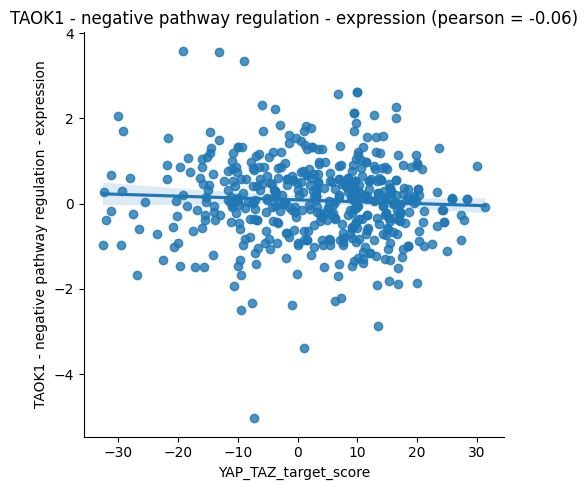

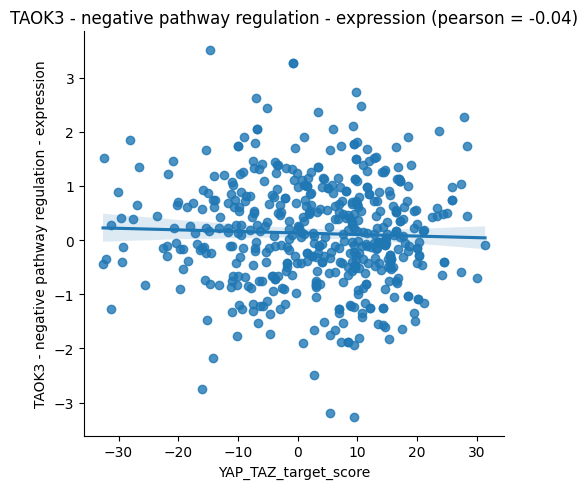

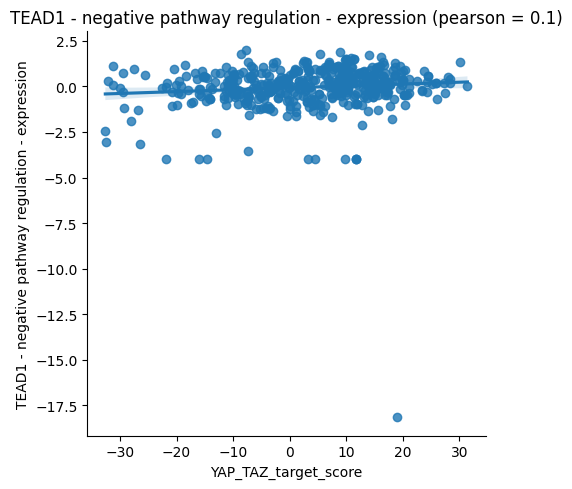

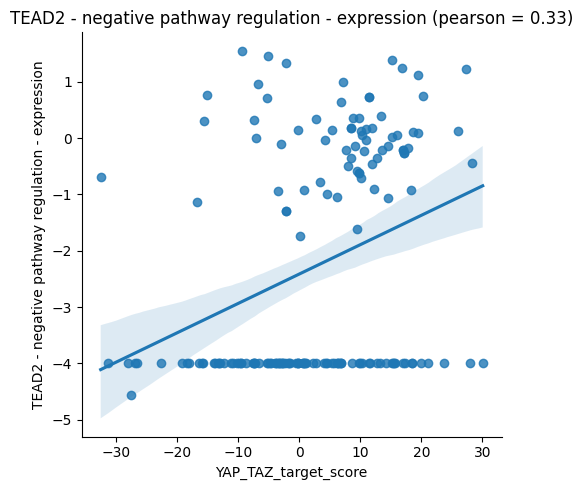

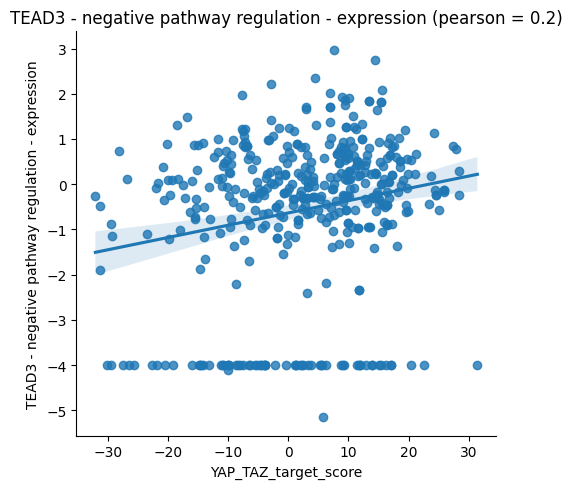

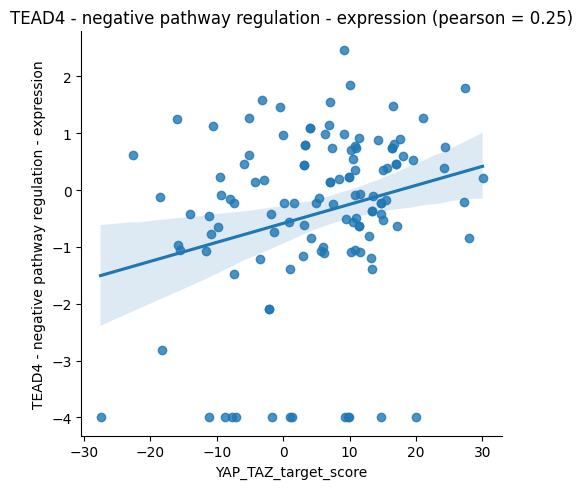

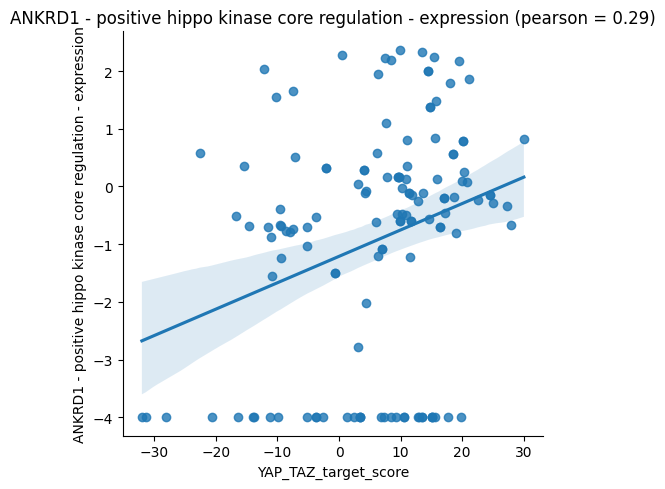

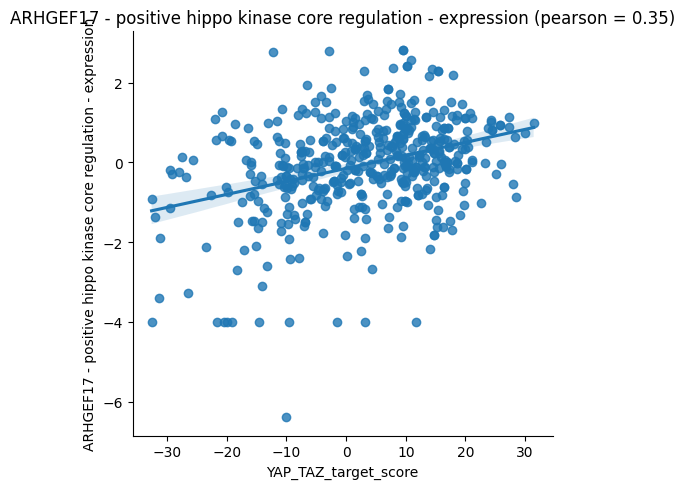

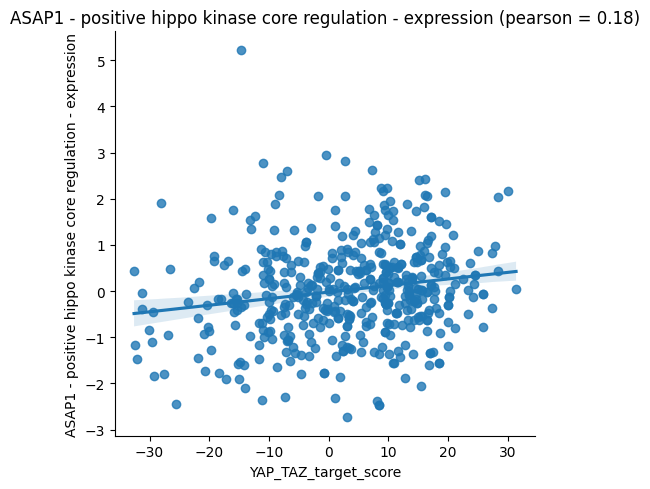

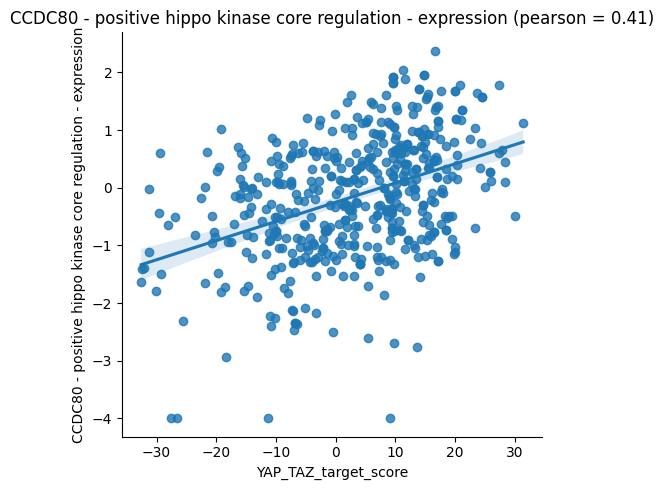

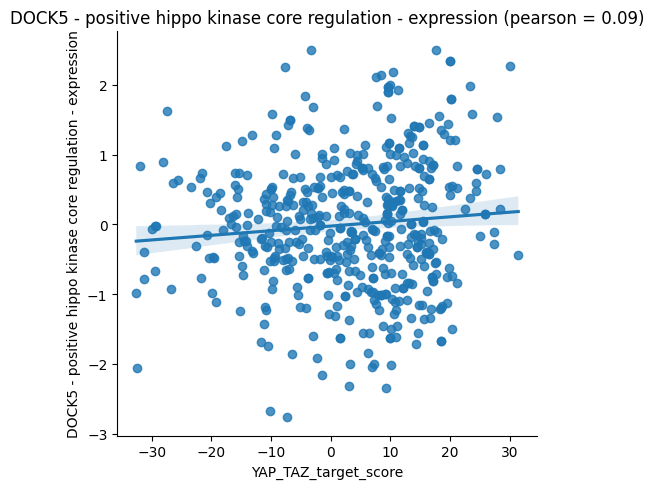

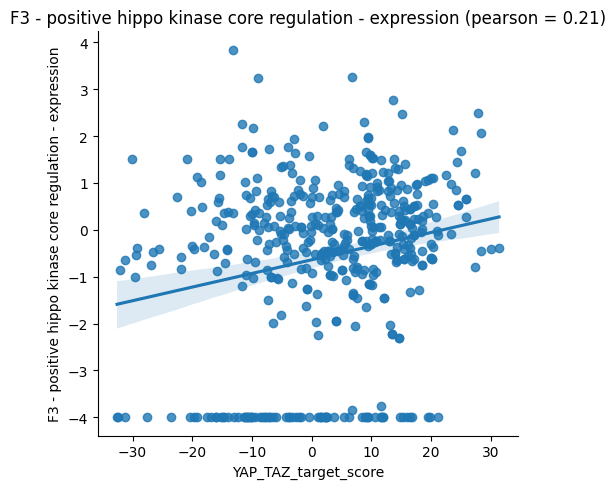

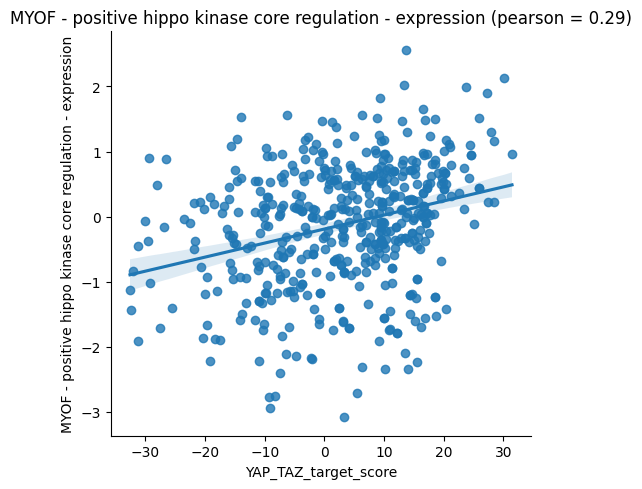

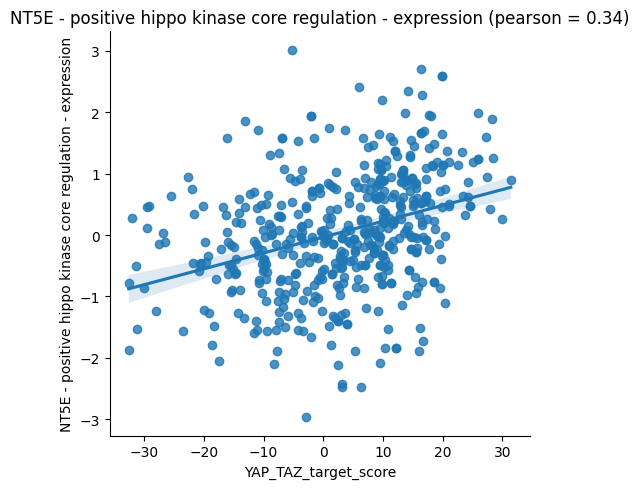

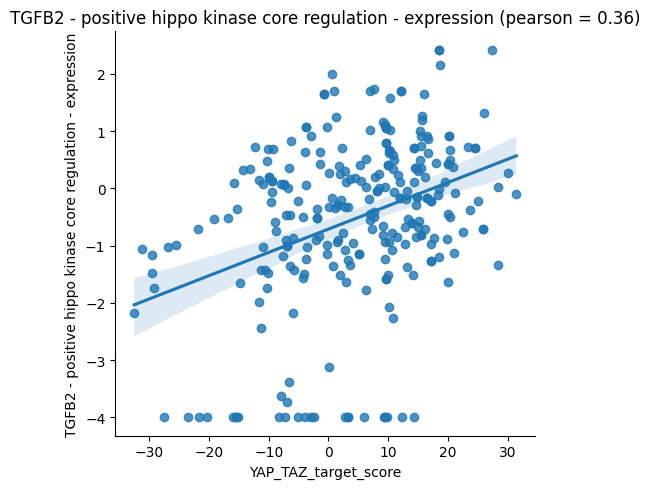

In [79]:
x='YAP_TAZ_target_score'
for y in result_df.columns:
    if x == y:
        continue

    common_df = result_df[[x,y]].dropna()
    if len(common_df) == 0:
        print(f"No common values for {y}")
        continue
    
    plot_correlation(common_df, x, y, data_dir)